# This assignment will help you to consolidate the concepts learnt in the session.

2.​ Problem Statement

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from
Kaggle. This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.
Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
Url=
https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic
-train.csv
titanic = pd.read_csv(url)
titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E
mbarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived.

## Solution

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [178]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [179]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [181]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [182]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some observations. We see that the survival rate is the 38%. Pclass has 3 integer values.It looks like we have some incomplete values for Age (714 non-null values of a total 891 

In [183]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [184]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [185]:
titanic.shape

(891, 12)

In [186]:
from scipy.stats import mode
titanic.Age[titanic.Age.isnull()] = titanic.Age.mean()
titanic.Age = titanic.Age.astype('int64')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Perform some exploratory analysis of various features against survival to see how well they are correlated. The features below are selected as they are complete, categorical/discretely valued.

In [187]:
titanic[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [188]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index =False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [189]:
titanic[['Age', 'Survived']].groupby(['Age'], as_index =False).mean().sort_values(by = 'Survived', ascending = False)

,Age,Survived
0,0,1.000000
12,12,1.000000
63,63,1.000000
53,53,1.000000
13,13,1.000000
70,80,1.000000
5,5,1.000000
3,3,0.833333
15,15,0.800000
1,1,0.714286


In [190]:
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [191]:

titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [192]:

titanic[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
83,12.6500,1.0
81,12.4750,1.0
79,12.2875,1.0
194,56.9292,1.0
77,12.0000,1.0


Some patterns are starting to become evident from the pivot tables above - FirstClass passengers are more likely to have survived, as are women. SibSp and Parch need further investigation.

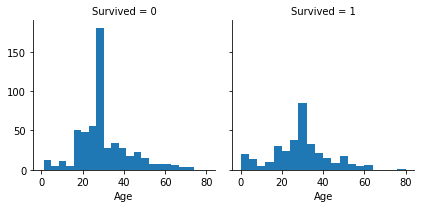

In [193]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Observations
Young Children had a high survival rate (>20%)
Many 15-25 year olds did not survive.
Majority of passengers are in the 15-35 age range

Correlating numerical and ordinal features

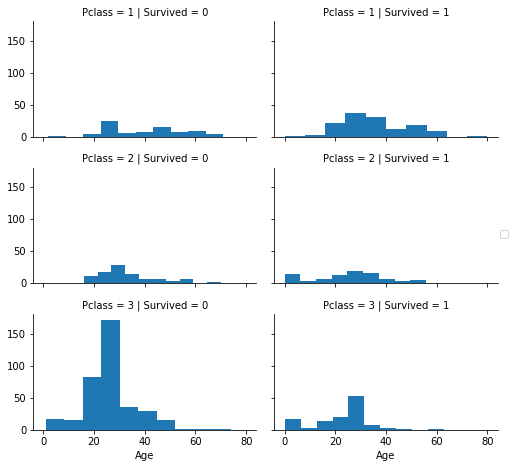

In [194]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6 )
grid.map(plt.hist, 'Age')
grid.add_legend()

Observations Pclass=3 had the most passengers but most of them did not survive. The youngest passengers (ie less than 5) in Pclass=2 and Pclass=3 mostly survived. Most passengers in Pclass=1 survived. Pclass varies in terms of Age distribution of passengers.
Based on these observations, Pclass is good to consider for model training

## Working with categorical values

In [195]:
cat_cols = titanic.dtypes[titanic.dtypes == 'object'].index
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [196]:
titanic["Sex"] = titanic["Sex"].map({"male": 1, "female":0})





In [197]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S


# Model

In [198]:
data_set = titanic[['Survived','Pclass','Sex' ,'Age','Fare','SibSp','Parch']]

In [199]:
data_set.head()

,Survived,Pclass,Sex,Age,Fare,SibSp,Parch
0,0,3,1,22,7.2500,1,0
1,1,1,0,38,71.2833,1,0
2,1,3,0,26,7.9250,0,0
3,1,1,0,35,53.1000,1,0
4,0,3,1,35,8.0500,0,0


In [200]:
data_set.shape

(891, 7)

In [201]:
data_set.corr()

,Survived,Pclass,Sex,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.067809,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.335071,-0.549500,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.082533,-0.182333,-0.114631,-0.245489
Age,-0.067809,-0.335071,0.082533,1.000000,0.093856,-0.232743,-0.176744
Fare,0.257307,-0.549500,-0.182333,0.093856,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.114631,-0.232743,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.176744,0.216225,0.414838,1.000000


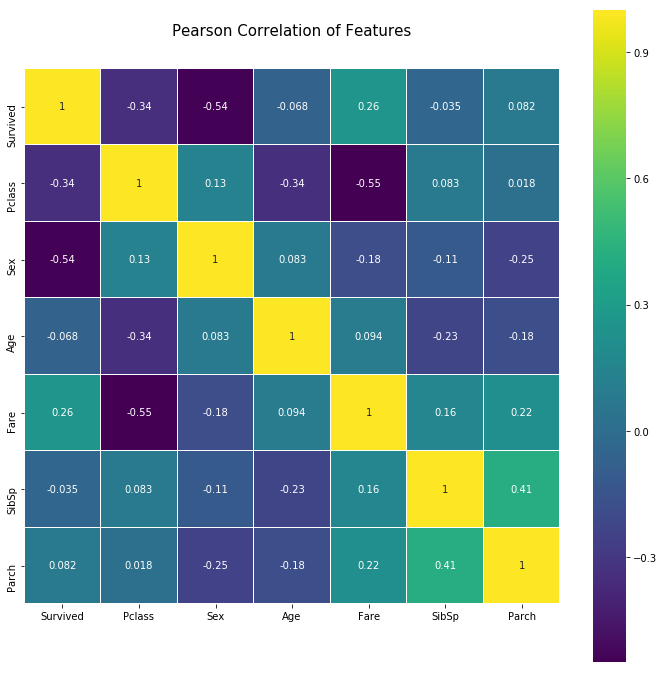

In [202]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Logistic Regression

In [203]:
data_set = titanic[['Pclass', 'Sex','Age','Fare','SibSp','Parch']]
X = data_set
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [204]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

print('train_accuracy:',round(logreg.score(X_train, y_train) * 100,2))
print('validation_accuracy:',round(logreg.score(X_test, y_test) * 100, 2))


train_accuracy: 79.79
validation_accuracy: 79.37


In [205]:
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[115  19]
 [ 27  62]]
             precision    recall  f1-score   support

          0       0.81      0.86      0.83       134
          1       0.77      0.70      0.73        89

avg / total       0.79      0.79      0.79       223



## Decision Tree

In [206]:
data_set = titanic[['Pclass','Sex','Age','Fare','SibSp','Parch']]
X = data_set
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [207]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
y_pred


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [208]:
print('train_accuracy:', round(decision_tree.score(X_train, y_train) * 100, 2))
print('validation_accuracy:',round(decision_tree.score(X_test, y_test) * 100, 2))

train_accuracy: 97.6
validation_accuracy: 76.68


In [209]:
y_test.describe()

count    223.000000
mean       0.399103
std        0.490816
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64